In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt

from SNN.snn import *
from SNN.Izhikevich import IzhikevichLayer
from SNN.stimulation import *
from SNN.receptive_field import *

# Setup
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = 'cpu'


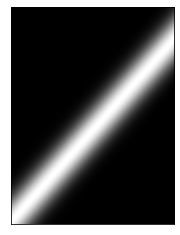

torch.Size([320, 240, 1])

In [2]:
# Set parameters for stimuli generation
rotation_degree = 45
num_frames = 1
image_height = 320
image_width = 240

# Generate stimuli
stimulation = generate_stimulus_series(rotation_degree, num_frames, image_height, image_width,amplitude = 1, visualize=True, device=device)

stimulation.shape

In [3]:
snn = SNN()


In [4]:
sa_spikes, ra_spikes = snn(stimulation)
sa_spikes, ra_spikes

snn.sa_layer.v

tensor([-68.0000, -68.0000, -68.0000, -68.0000, -68.0000, -67.9981, -67.9634,
        -67.0242, -68.0000, -68.0000, -68.0000, -68.0000, -67.9998, -67.9723,
        -67.2687, -61.6722, -68.0000, -68.0000, -68.0000, -67.9997, -67.9555,
        -66.9700, -61.0970, -47.0836, -68.0000, -68.0000, -67.9995, -67.9920,
        -67.5446, -62.1386, -47.4438, -43.5828, -68.0000, -68.0000, -67.9926,
        -67.7045, -64.4358, -50.0798, -44.1963, -53.8888, -68.0000, -67.9904,
        -67.7771, -64.4536, -50.4018, -36.4710, -52.3681, -65.1306, -67.9979,
        -67.8328, -65.7258, -51.7160, -41.7319, -54.0131, -64.1133, -67.6868,
        -67.9286, -66.2064, -55.4822, -40.5706, -50.1018, -63.3236, -67.6943,
        -67.9944, -65.8643, -56.4220, -44.3790, -50.2440, -62.6786, -67.5824,
        -67.9608, -67.9990, -60.0189, -44.2451, -47.9934, -62.5546, -67.1529,
        -67.9564, -67.9999, -68.0000, -45.2935, -44.8958, -58.0462, -67.1442,
        -67.9819, -67.9998, -68.0000, -68.0000])

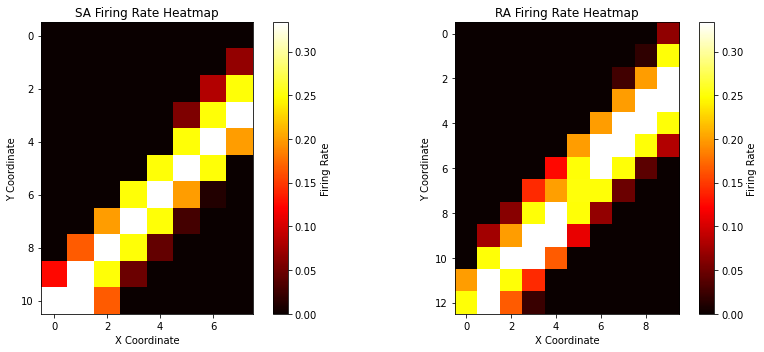

In [5]:
# Set the number of iterations
num_iterations = 10000

# Get the receptive field dimensions from the SNN instance
sa_rf_dim = snn.sa_rf_dim
ra_rf_dim = snn.ra_rf_dim

# Lists to store spikes for each iteration in 2D shape
sa_spikes_2d_list = []
ra_spikes_2d_list = []

# Iterate the stimulus through the SNN 100 times
for _ in range(num_iterations):
    sa_spikes, ra_spikes = snn(stimulation)
    sa_spikes_2d_list.append(sa_spikes.reshape(sa_rf_dim))
    ra_spikes_2d_list.append(ra_spikes.reshape(ra_rf_dim))

# Convert lists to tensors
sa_spikes_2d_tensor = torch.stack(sa_spikes_2d_list)
ra_spikes_2d_tensor = torch.stack(ra_spikes_2d_list)

# Calculate the average firing rate for 2D grid
sa_firing_rate_2d = sa_spikes_2d_tensor.mean(dim=0)
ra_firing_rate_2d = ra_spikes_2d_tensor.mean(dim=0)

# Visualizing the 2D firing rates as heatmaps
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(sa_firing_rate_2d, cmap='hot', interpolation='nearest')
plt.colorbar(label='Firing Rate')
plt.title('SA Firing Rate Heatmap')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.subplot(1, 2, 2)
plt.imshow(ra_firing_rate_2d, cmap='hot', interpolation='nearest')
plt.colorbar(label='Firing Rate')
plt.title('RA Firing Rate Heatmap')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.tight_layout()
plt.show()


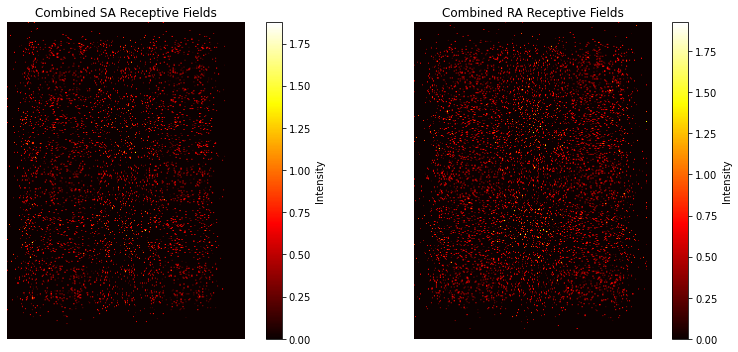

In [6]:
# Summing up all the receptive fields to visualize overlap
combined_sa_rf = snn.sa_rf.sum(dim=0).reshape(320, 240)
combined_ra_rf = snn.ra_rf.sum(dim=0).reshape(320, 240)
# Attempt to visualize the combined receptive fields again
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(combined_sa_rf, cmap='hot')
plt.colorbar(label='Intensity')
plt.axis('off')
plt.title('Combined SA Receptive Fields')

plt.subplot(1, 2, 2)
plt.imshow(combined_ra_rf, cmap='hot')
plt.colorbar(label='Intensity')
plt.axis('off')
plt.title('Combined RA Receptive Fields')

plt.tight_layout()
plt.show()